### Import Libraries

In [1]:
from sklearn.datasets import load_breast_cancer # load dataset
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
%matplotlib inline 

### Load Dataset

In [2]:
# Load the cancer dataset
data = load_breast_cancer()

In [3]:
X = data.data #loads independent variables into X
y = data.target #Loads dependent variables into Y

### Standardization

In [4]:
scaler = StandardScaler() #initialize scaler
X_scaled = scaler.fit_transform(X) # fit scaler to independent variable

### PCA Implementation

In [5]:
pca = PCA(n_components=30) #initialize PCA with 30 components
pca.fit(X_scaled) 

PCA(n_components=30)

In [6]:
# print explained variance
print(pca.explained_variance_)

[1.33049908e+01 5.70137460e+00 2.82291016e+00 1.98412752e+00
 1.65163324e+00 1.20948224e+00 6.76408882e-01 4.77456255e-01
 4.17628782e-01 3.51310875e-01 2.94433153e-01 2.61621161e-01
 2.41782421e-01 1.57286149e-01 9.43006956e-02 8.00034045e-02
 5.95036135e-02 5.27114222e-02 4.95647002e-02 3.12142606e-02
 3.00256631e-02 2.74877113e-02 2.43836914e-02 1.80867940e-02
 1.55085271e-02 8.19203712e-03 6.91261258e-03 1.59213600e-03
 7.50121413e-04 1.33279057e-04]


In [7]:
# print eigen vectors
print(pca.components_)

[[ 2.18902444e-01  1.03724578e-01  2.27537293e-01  2.20994985e-01
   1.42589694e-01  2.39285354e-01  2.58400481e-01  2.60853758e-01
   1.38166959e-01  6.43633464e-02  2.05978776e-01  1.74280281e-02
   2.11325916e-01  2.02869635e-01  1.45314521e-02  1.70393451e-01
   1.53589790e-01  1.83417397e-01  4.24984216e-02  1.02568322e-01
   2.27996634e-01  1.04469325e-01  2.36639681e-01  2.24870533e-01
   1.27952561e-01  2.10095880e-01  2.28767533e-01  2.50885971e-01
   1.22904556e-01  1.31783943e-01]
 [-2.33857132e-01 -5.97060883e-02 -2.15181361e-01 -2.31076711e-01
   1.86113023e-01  1.51891610e-01  6.01653628e-02 -3.47675005e-02
   1.90348770e-01  3.66575471e-01 -1.05552152e-01  8.99796818e-02
  -8.94572342e-02 -1.52292628e-01  2.04430453e-01  2.32715896e-01
   1.97207283e-01  1.30321560e-01  1.83848000e-01  2.80092027e-01
  -2.19866379e-01 -4.54672983e-02 -1.99878428e-01 -2.19351858e-01
   1.72304352e-01  1.43593173e-01  9.79641143e-02 -8.25723507e-03
   1.41883349e-01  2.75339469e-01]
 [-8.5

In [8]:
# print the percentage of variation explained by each eigen Vector
print(pca.explained_variance_ratio_)

[4.42720256e-01 1.89711820e-01 9.39316326e-02 6.60213492e-02
 5.49576849e-02 4.02452204e-02 2.25073371e-02 1.58872380e-02
 1.38964937e-02 1.16897819e-02 9.79718988e-03 8.70537901e-03
 8.04524987e-03 5.23365745e-03 3.13783217e-03 2.66209337e-03
 1.97996793e-03 1.75395945e-03 1.64925306e-03 1.03864675e-03
 9.99096464e-04 9.14646751e-04 8.11361259e-04 6.01833567e-04
 5.16042379e-04 2.72587995e-04 2.30015463e-04 5.29779290e-05
 2.49601032e-05 4.43482743e-06]


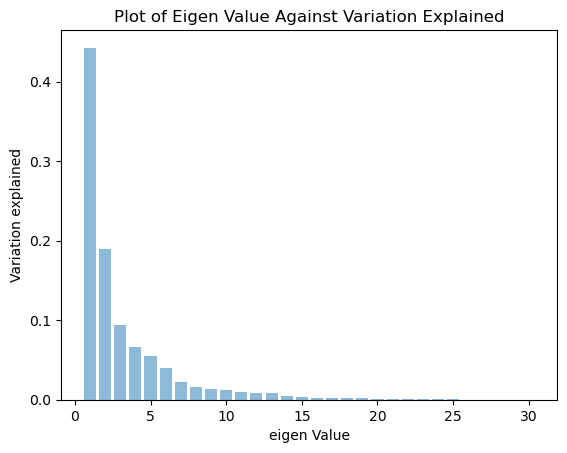

In [10]:
# Plot of eigen values and variance explained
plt.bar(list(range(1,31)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.title('Plot of Eigen Value Against Variation Explained')
plt.show()

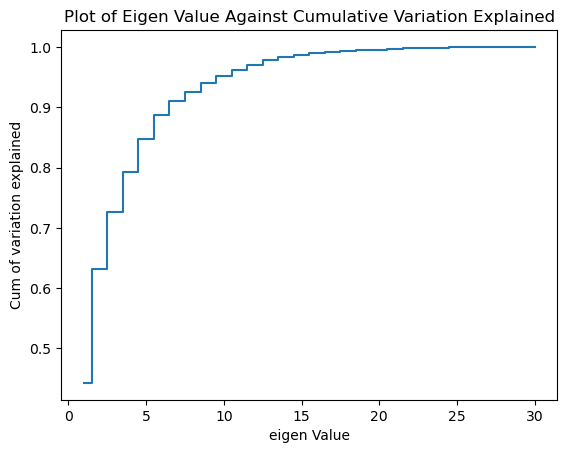

In [11]:
#  Plot of eigen values and cumulative variance explained
plt.step(list(range(1,31)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.title('Plot of Eigen Value Against Cumulative Variation Explained')
plt.show()

* Over 70% cumulative variation can be explained by two variables

### Dimensionality Reduction 

In [14]:
# As instructed, we will reduce dimentionality to 2 since variables we can explain over 70% of the variation in the dataset
pca_2 = PCA(n_components=2)
pca_2.fit(X_scaled)
print(pca_2.components_)
print(pca_2.explained_variance_ratio_)
X_pca_2 = pca_2.transform(X_scaled)  

[[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]
[0.44272026 0.18971182]


In [15]:
X_pca_2

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011],
       [-5.4752433 , -0.67063679]])

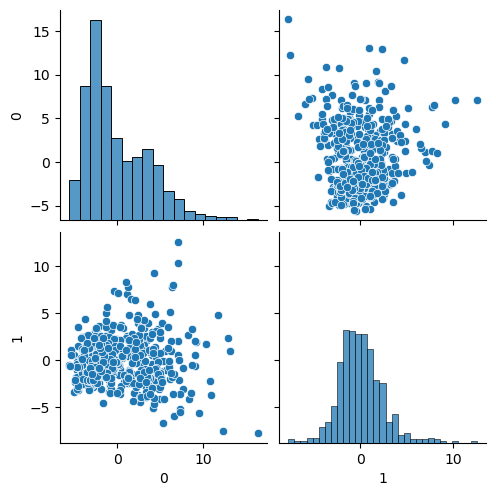

In [16]:
# Visualize two dimensionality  reduced dataset
sns.pairplot(pd.DataFrame(X_pca_2))

### Implement Logistic Regression

In [18]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_pca_2, y, test_size=0.2, random_state=42)

In [19]:
# Train Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [20]:
# Predict on test data
y_pred = model.predict(X_test)

In [21]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [22]:
print(f"Model Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)

Model Accuracy: 0.99
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.99      1.00      0.99        71

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



In [23]:
# Explained variance of the PCA components
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance)
print(f"Total variance explained by the 2 components: {explained_variance.sum():.2f}")

Explained Variance Ratio: [4.42720256e-01 1.89711820e-01 9.39316326e-02 6.60213492e-02
 5.49576849e-02 4.02452204e-02 2.25073371e-02 1.58872380e-02
 1.38964937e-02 1.16897819e-02 9.79718988e-03 8.70537901e-03
 8.04524987e-03 5.23365745e-03 3.13783217e-03 2.66209337e-03
 1.97996793e-03 1.75395945e-03 1.64925306e-03 1.03864675e-03
 9.99096464e-04 9.14646751e-04 8.11361259e-04 6.01833567e-04
 5.16042379e-04 2.72587995e-04 2.30015463e-04 5.29779290e-05
 2.49601032e-05 4.43482743e-06]
Total variance explained by the 2 components: 1.00
